In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

### Example with size and legend

In [3]:
def average(series):
    return float(sum(series)) / len(series)


# moving average using n last points
def moving_average(series, n):
    return average(series[-n:])


def average(series, n=None):
    if n is None:
        return average(series, len(series))
    return float(sum(series[-n:])) / n


# weighted average, weights is a list of weights
def weighted_average(series, weights):
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series[-n - 1] * weights[n]
    return result


weights = [0.1, 0.2, 0.3, 0.4]


# given a series and alpha, return series of smoothed points
def exponential_smoothing(series, alpha):
    result = [series[0]]  # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n - 1])
    return result


# given a series and alpha, return series of smoothed points
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series) + 1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series):  # we are forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend
                                                                  )
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result


series = [
    30, 21, 29, 31, 40, 48, 53, 47, 37, 39, 31, 29, 17, 9, 20, 24, 27, 35, 41,
    38, 27, 31, 27, 26, 21, 13, 21, 18, 33, 35, 40, 36, 22, 24, 21, 20, 17, 14,
    17, 19, 26, 29, 40, 31, 20, 24, 18, 26, 17, 9, 17, 21, 28, 32, 46, 33, 23,
    28, 22, 27, 18, 8, 17, 21, 31, 34, 44, 38, 31, 30, 26, 32
]
n = len(series)


def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i + slen] - series[i]) / slen
    return sum / slen


def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series) / slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(
            sum(series[slen * j:slen * j + slen]) / float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen * j + i] - season_averages[j]
        seasonals[i] = sum_of_vals_over_avg / n_seasons
    return seasonals


def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series) + n_preds):
        if i == 0:  # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series):  # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m * trend) + seasonals[i % slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha * (
                val - seasonals[i % slen]) + (1 - alpha) * (smooth + trend)
            trend = beta * (smooth - last_smooth) + (1 - beta) * trend
            seasonals[i % slen] = gamma * (val - smooth) + (
                1 - gamma) * seasonals[i % slen]
            result.append(smooth + trend + seasonals[i % slen])
    return result

Reference:
- https://grisha.org/blog/2016/01/29/triple-exponential-smoothing-forecasting/

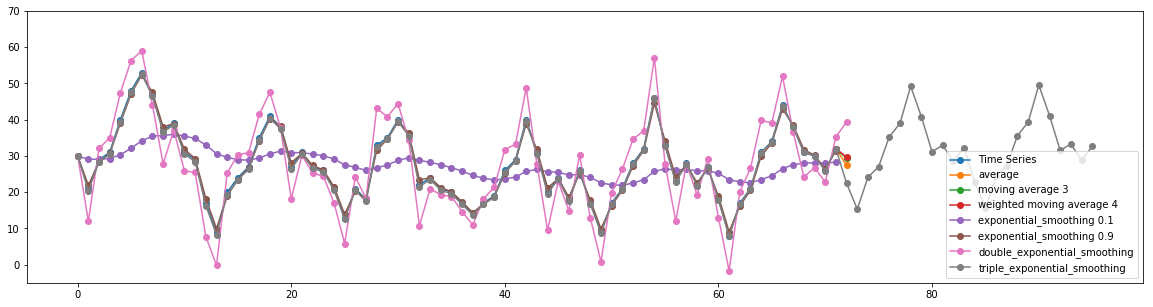

In [4]:
fig, ax = plt.subplots(figsize=(20, 5)) 
ax.plot(series, '-o', label='Time Series')
ax.set_ylim([-5, 70])
ax.plot([n-1, n], [series[-1], average(series)], '-o', label='average')
ax.plot([n-1, n], [series[-1], moving_average(series, 3)], '-o', label='moving average 3')
ax.plot([n-1, n], [series[-1], weighted_average(series, weights)], '-o', label='weighted moving average 4')
ax.plot(exponential_smoothing(series, 0.1), '-o', label='exponential_smoothing 0.1')
ax.plot(exponential_smoothing(series, 0.9), '-o', label='exponential_smoothing 0.9')
ax.plot(double_exponential_smoothing(series, alpha=0.9, beta=0.9), '-o', label='double_exponential_smoothing')
ax.plot(triple_exponential_smoothing(series, 12, 0.716, 0.029, 0.993, 24), '-o', label='triple_exponential_smoothing')
ax.legend(loc=4)

### Change plot style

In [ ]:
plt.style.available

In [5]:
plt.style.use('ggplot')

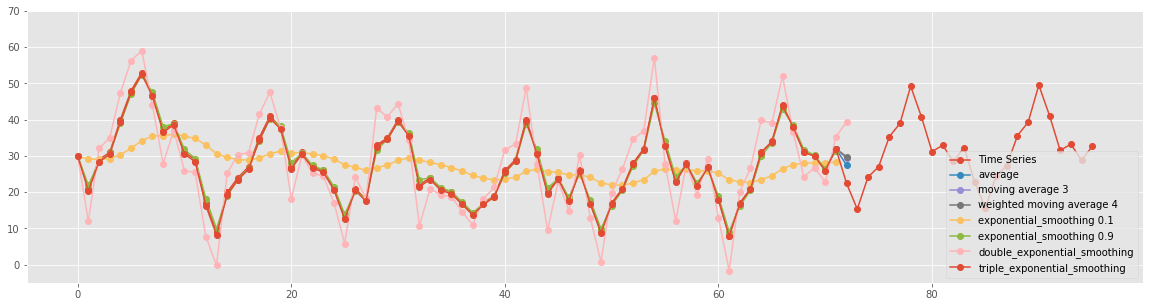

In [6]:
fig, ax = plt.subplots(figsize=(20, 5)) 
ax.plot(series, '-o', label='Time Series')
ax.set_ylim([-5, 70])
ax.plot([n-1, n], [series[-1], average(series)], '-o', label='average')
ax.plot([n-1, n], [series[-1], moving_average(series, 3)], '-o', label='moving average 3')
ax.plot([n-1, n], [series[-1], weighted_average(series, weights)], '-o', label='weighted moving average 4')
ax.plot(exponential_smoothing(series, 0.1), '-o', label='exponential_smoothing 0.1')
ax.plot(exponential_smoothing(series, 0.9), '-o', label='exponential_smoothing 0.9')
ax.plot(double_exponential_smoothing(series, alpha=0.9, beta=0.9), '-o', label='double_exponential_smoothing')
ax.plot(triple_exponential_smoothing(series, 12, 0.716, 0.029, 0.993, 24), '-o', label='triple_exponential_smoothing')
ax.legend(loc=4)

### Reference:
- http://pbpython.com/effective-matplotlib.html